# Exploring inferred tree sequences

In this notebook we'll explore properties of an inferred tree sequence from the Human Genome Diversity Project and Simons Genome Diversity Project data.

In [34]:
import tskit
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns
import cartopy
import cartopy.crs as ccrs

In [2]:
# To download the data TODO: link to Zenodo
ts = tskit.load("/Users/anthonywohns/Downloads/hgdp_sgdp_high_cov_ancients_chr20.dated.trees")

In [3]:
ts

In [14]:
# Plot the number of ancestral lineages at different points in time
def count_edges_at_time(t):
    time = ts.tables.nodes.time
    child = ts.tables.edges.child
    parent = ts.tables.edges.parent
    # Find edges that have children which live before time t
    return np.sum(np.logical_and(time[child] <= t, time[parent] > t))


In [15]:
log_scale = 2 ** np.arange(15.0)
log_scale = np.concatenate([[0], log_scale])

In [20]:
ancestors_at_t = []
for i in log_scale:
    ancestors_at_t.append(count_edges_at_time(i))

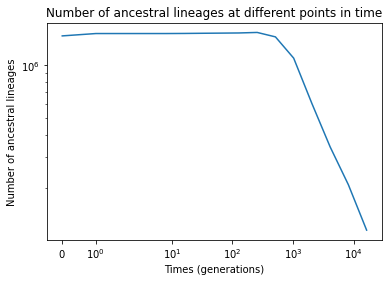

In [19]:
plt.plot(log_scale, ancestors_at_t)
plt.xscale("symlog")
plt.yscale("log")
plt.xlabel("Times (generations)")
plt.ylabel("Number of ancestral lineages")
plt.title("Number of ancestral lineages at different points in time")
plt.show()

This is reassuring because there are millions of internal nodes, but also millions of edges tethering those ancestors to the samples.

# Where are samples located geographically?


In [23]:
locations = []
for indiv in ts.individuals():
    if len(indiv.location) > 0:
        locations.append(indiv.location)
        locations.append(indiv.location)
locations = np.array(locations)

Text(0.5, 1.0, 'Geographic location of samples')

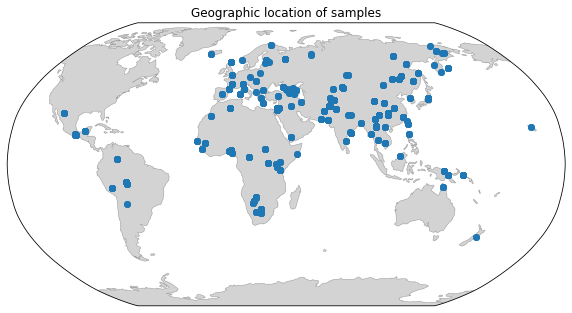

In [27]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=41))
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.LAND, facecolor="lightgray")
ax.set_global()
plt.scatter(locations[:,1], locations[:,0], transform=ccrs.PlateCarree(),)
plt.title("Geographic location of samples")

In [32]:
# How many unique locations are there?
len(np.unique(locations, axis=0))

139

# Ancient Samples Geographic Spread

In [94]:
aadr_locations = pd.read_csv("/Users/anthonywohns/Downloads/v50.0_1240K_public.anno", delimiter="\t")

In [95]:
ancient_locations = aadr_locations[aadr_locations['Date mean in BP in years before 1950 CE [OxCal mu for a direct radiocarbon date, and average of range for a contextual date]'] != 0]

In [96]:
ancient_locations.loc["Lat."] = ancient_locations["Lat."].replace('..',np.NaN)
ancient_locations.loc["Long."] = ancient_locations["Long."].replace('..',np.NaN)

/opt/miniconda3/envs/tspyro/lib/python3.7/site-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [97]:
ancient_coords = np.array([ancient_locations["Lat."].to_numpy(), ancient_locations["Long."].to_numpy()]).T.astype(float)

ValueError: could not convert string to float: '..'

Text(0.5, 1.0, 'Geographic location of ancient samples')

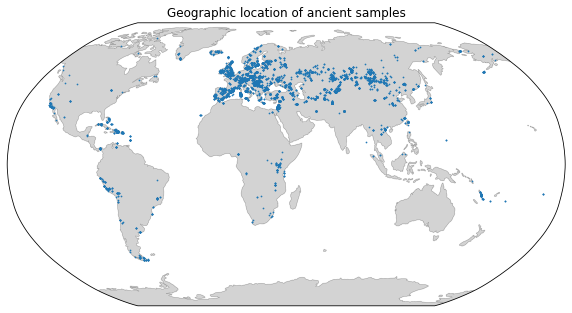

In [98]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=41))
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.LAND, facecolor="lightgray")
ax.set_global()
plt.scatter(ancient_coords[:,1], ancient_coords[:,0], transform=ccrs.PlateCarree(),s=0.5)
plt.title("Geographic location of ancient samples")

In [99]:
# How many unique locations are there?
len(np.unique(ancient_coords, axis=0))

1859

How old are these samples?

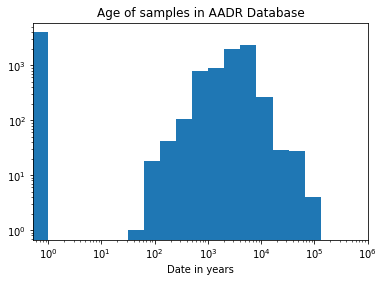

In [116]:
plt.hist(aadr_locations['Date mean in BP in years before 1950 CE [OxCal mu for a direct radiocarbon date, and average of range for a contextual date]'],
        bins=np.concatenate([[0],2 ** np.arange(20.)]))
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Date in years")
plt.title("Age of samples in AADR Database")
plt.show()

## What's the overlap with the HGDP + SGDP?

The AADR dataset contains genotyping data from the "1240k" SNP array.

In [126]:
snps = pd.read_csv("~/Downloads/v50.0_1240K_public.snp", header=None)


In [134]:
import os
from collections import Counter
fields = ["id", "chromosome", "frequency", "position", "ref", "alt"]
cols = {k: [] for k in fields}
with open(os.path.expanduser("~/Downloads/v50.0_1240K_public.snp"), "rt") as f:
    for line in f:
        line = line.strip().split()
        if len(line) == len(fields):
            for k, v in zip(fields, line):
                cols[k].append(v)
print(len(cols["id"]))

1233013


In [136]:
for c, count in Counter(cols["chromosome"]).most_common():
    print(c, count)

2 98657
1 93166
3 81416
6 78867
5 74004
4 71634
8 63916
7 62595
10 61131
11 57163
12 56133
9 52765
23 49704
13 40441
14 37903
16 36000
15 35991
18 35327
24 32670
17 30733
20 30377
19 19273
21 16727
22 16420
